In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv("train.csv")

In [130]:
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [132]:
df['escuelascercanas'].value_counts()

0.0    133406
1.0    106594
Name: escuelascercanas, dtype: int64

In [133]:
df['piscina'].value_counts()

0.0    219028
1.0     20972
Name: piscina, dtype: int64

In [134]:
df['centroscomercialescercanos'].value_counts() 

0.0    144832
1.0     95168
Name: centroscomercialescercanos, dtype: int64

In [135]:
df['gimnasio'].value_counts()

0.0    225006
1.0     14994
Name: gimnasio, dtype: int64

In [136]:
df['usosmultiples'].value_counts()

0.0    226778
1.0     13222
Name: usosmultiples, dtype: int64

In [137]:
df['precio'].value_counts()

1500000.0     3041
2500000.0     3036
1200000.0     2909
3500000.0     2726
1300000.0     2480
2200000.0     2420
1100000.0     2394
1800000.0     2290
1600000.0     2217
850000.0      2192
750000.0      2163
1250000.0     2159
2300000.0     2108
1350000.0     2103
650000.0      2061
3200000.0     2054
4500000.0     2040
2000000.0     1904
950000.0      1867
1650000.0     1865
2800000.0     1863
1400000.0     1850
550000.0      1820
2100000.0     1802
3000000.0     1791
1700000.0     1763
1850000.0     1760
2600000.0     1735
1150000.0     1722
1750000.0     1702
              ... 
10807000.0       1
468778.0         1
675411.0         1
468768.0         1
7500250.0        1
10815000.0       1
3752490.0        1
469105.0         1
338144.0         1
1352990.0        1
938630.0         1
10822700.0       1
2705670.0        1
1877000.0        1
407500.0         1
1352610.0        1
676300.0         1
2705184.0        1
938426.0         1
1876500.0        1
1352560.0        1
469208.0    

In [138]:
#NUMERICOS ENTEROS QUE ERAN INNECESARIAMENTE FLOAT
#------------------------------------------------#

#NUMERICOS QUE SOLO SON CERO O UNO
df['usosmultiples'] = df['usosmultiples'].astype('bool')
df['piscina'] = df['piscina'].astype('bool')
df['gimnasio'] = df['gimnasio'].astype('bool')
df['escuelascercanas'] = df['escuelascercanas'].astype('bool')
df['centroscomercialescercanos'] = df['centroscomercialescercanos'].astype('bool')


#FECHA DE PUBLICACION A DATETIME
df['fecha'] = pd.to_datetime(df['fecha'])


# A estos hay que limpiarles los inf y los NaN antes de convertir a int

#df['antiguedad'] = df.antiguedad.astype('int64')
#df['garages'] = df.garages.astype('int64')
#df['habitaciones'] = df.habitaciones.astype('int64')
#df['metrostotales'] = df.metrostotales.astype('int64')
#df['metroscubiertos'] = df.metroscubiertos.astype('int64')
#df['idzona'] = df.idzona.astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [139]:
# A estos hay que limpiarles los inf y los NaN antes de convertir a int

#df['antiguedad'] = df.antiguedad.astype('int64')
#df['garages'] = df.garages.astype('int64')
#df['habitaciones'] = df.habitaciones.astype('int64')
#df['metrostotales'] = df.metrostotales.astype('int64')
#df['metroscubiertos'] = df.metroscubiertos.astype('int64')
#df['idzona'] = df.idzona.astype('int64')

In [140]:
df['antiguedad'].value_counts()

0.0     50335
5.0     33268
10.0    28844
20.0    19904
1.0     12353
4.0      7944
3.0      5616
2.0      5059
15.0     3965
6.0      3169
30.0     3055
8.0      2418
25.0     2297
7.0      2046
12.0     1492
11.0     1434
40.0     1347
50.0     1193
9.0      1065
35.0      938
18.0      908
21.0      742
16.0      700
14.0      616
13.0      577
17.0      529
22.0      448
28.0      396
26.0      369
45.0      329
        ...  
47.0       40
55.0       38
48.0       36
46.0       31
70.0       29
41.0       27
80.0       27
53.0       17
49.0       17
65.0       17
52.0       11
58.0       10
54.0        9
75.0        6
66.0        5
59.0        5
69.0        5
67.0        4
57.0        4
63.0        4
62.0        3
56.0        3
74.0        2
68.0        2
79.0        2
61.0        2
76.0        2
71.0        1
77.0        1
64.0        1
Name: antiguedad, Length: 78, dtype: int64

In [141]:
len(df)

240000

In [142]:
#Vemos cuántos NaN hay por columna, sabiendo que el total es 240000
df.isnull().sum()

id                                 0
titulo                          5387
descripcion                     1619
tipodepropiedad                   46
direccion                      53072
ciudad                           372
provincia                        155
antiguedad                     43555
habitaciones                   22471
garages                        37765
banos                          26221
metroscubiertos                17400
metrostotales                  51467
idzona                         28621
lat                           123488
lng                           123488
fecha                              0
gimnasio                           0
usosmultiples                      0
piscina                            0
escuelascercanas                   0
centroscomercialescercanos         0
precio                             0
dtype: int64

In [143]:
#Reemplazo los NaN por 0
df.loc[(df['lat']).isnull(),['lat']]=0
df.loc[(df['lng']).isnull(),['lng']]=0

In [144]:
df['lat'].isnull().sum()

0

In [145]:
df['lng'].isnull().sum()

0

In [146]:
df['lat'].value_counts()

0.000000     123936
23.063781         8
23.054936         7
19.314000         6
19.392000         6
19.391000         6
19.617000         6
19.393000         6
19.358000         6
19.489000         6
23.053672         6
19.558000         6
19.457000         6
19.410000         6
32.454473         5
23.068835         5
19.300000         5
19.332000         5
19.503000         5
19.369000         5
19.485000         5
19.388000         5
19.344000         5
19.350000         5
19.387000         5
19.437000         5
19.397000         5
19.478000         5
19.444000         5
19.494000         5
              ...  
17.094446         1
20.997915         1
19.591669         1
19.417518         1
19.727337         1
19.476194         1
19.359454         1
19.287115         1
18.987497         1
19.495689         1
20.662757         1
19.492759         1
20.743466         1
21.160287         1
19.433077         1
19.359921         1
19.361805         1
20.642669         1
24.009796         1


In [147]:
df['lng'].value_counts()

 0.000000      123937
-99.225000         12
-99.218984          9
-99.139000          8
-99.213000          8
-99.230000          8
-99.143540          7
-99.156000          7
-99.125000          7
-99.191000          7
-99.227000          7
-99.177446          7
-99.234000          7
-99.200000          7
-99.144000          7
-99.183676          7
-99.163000          7
-99.175000          6
-99.171909          6
-99.055727          6
-99.153000          6
-99.195000          6
-99.202366          6
-99.133163          6
-99.170000          6
-99.258000          6
-99.226000          6
-99.165000          6
-99.211000          6
-99.161000          6
                ...  
-100.976336         1
-103.439241         1
-103.464754         1
-96.191890          1
-99.303276          1
-116.761322         1
-106.117890         1
-99.007759          1
-98.941038          1
-100.369562         1
-102.311859         1
-99.156190          1
-99.136433          1
-100.102952         1
-100.42845

In [148]:
#Ahora cambio el tipo de dato de las columnas 'lat' y 'lng'
df['lat'] = df['lat'].astype(np.float32)
df['lng'] = df['lng'].astype(np.float32)

In [149]:
df['titulo'].value_counts()

casa en venta                                                            468
departamento en venta                                                    289
casa en venta en chihuahua                                               268
casa en venta en querétaro                                               238
departamento en venta en benito juárez                                   221
departamento en venta en miguel hidalgo                                  177
casa en venta en mérida                                                  167
casa en venta                                                            132
casa en venta en torreón                                                 119
casa en venta en monterrey                                               115
casa en venta en mérida, yucatán                                         115
casa en venta en puebla                                                  112
casa en venta en juárez                                                  111

In [150]:
#Elimino los NaN
df.loc[(df['titulo']).isnull(), ['titulo']] = ''
df['titulo'] = df['titulo'].astype(str)

In [151]:
df['banos'].value_counts()

2.0    87683
1.0    58173
3.0    49365
4.0    18558
Name: banos, dtype: int64

In [152]:
#Lo paso a tipo category porque tenemos 4 valores distintos 
df.loc[(df['banos']).isnull(), ['banos']] = 0
df['banos'] = df['banos'].astype('category')

In [153]:
df['garages'].value_counts()

2.0    94167
1.0    59464
0.0    26926
3.0    21678
Name: garages, dtype: int64

In [154]:
#Lo paso a tipo category porque tenemos 4 valores distintos 
df.loc[(df['garages']).isnull(), ['garages']] = 0
df['garages'] = df['garages'].astype('category')

In [155]:
df['direccion'].value_counts()

-                                                           660
.                                                           476
1                                                           212
Calle                                                       194
Norte de Mérida                                             136
x #x                                                        122
0                                                           113
domicilio conocido                                          105
Calle 18 No.344 x 11 y 13 Col. Camara de Comercio Norte      94
calle                                                        94
Juriquilla                                                   84
El Refugio                                                   78
x                                                            77
Metepec                                                      77
CENTRO                                                       75
JURIQUILLA                              

In [156]:
#Limpio las direcciones que no son calles

df.loc[(df['direccion']).isnull(), ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'S/N', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'Sin nombre', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == '0', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == '--', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == '...', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == '-', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == '.', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'x #x', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'x', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'calle', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'Calle', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == '1', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'X', ['direccion']] = 'S/D'

In [157]:
df['direccion'] = df['direccion'].astype('str')

In [158]:
#verifico si se publico mas de una vez la misma vivienda 
df['direccion'].value_counts()

S/D                                                         55405
Norte de Mérida                                               136
domicilio conocido                                            105
Calle 18 No.344 x 11 y 13 Col. Camara de Comercio Norte        94
Juriquilla                                                     84
El Refugio                                                     78
Metepec                                                        77
CENTRO                                                         75
JURIQUILLA                                                     74
Bosque Real                                                    68
EL REFUGIO                                                     68
Chihuahua, CHIH, México                                        67
CALLE                                                          66
Norte                                                          64
Cumbres del Lago                                               64
Centro    

In [159]:
filtro = df['direccion']=="Calle 60 No.191, primer piso, Col. Cordemex"   
df1=df[filtro]
df1.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
1555,139993,venta de preciosa casa en privada residencial ...,<p>terreno 400m2 (10 x 40)construcci&oacute;n ...,Casa,"Calle 60 No.191, primer piso, Col. Cordemex",Mérida,Yucatán,0.0,3.0,2.0,...,114343.0,0.0,0.0,2013-11-01,False,False,True,False,True,1550000.0
6941,121587,casa en pre venta en dzitya!! m.n.amplio terr...,<p>terreno: 13.06 x 44.00 ( 573.32 m2 ).constr...,Casa,"Calle 60 No.191, primer piso, Col. Cordemex",Mérida,Yucatán,0.0,3.0,2.0,...,114325.0,0.0,0.0,2013-11-01,False,False,False,False,True,1298000.0
7022,272949,casa en venta en privada residencial de xcanat...,<p>terreno 15 x 35 (531 m2 aprox ). construcci...,Casa,"Calle 60 No.191, primer piso, Col. Cordemex",Mérida,Yucatán,0.0,3.0,2.0,...,114324.0,0.0,0.0,2013-09-10,False,False,True,True,True,3205000.0
10441,262898,aproveche hermosas casa en venta en las margar...,<p>terreno: 10 x 25 ( 250 m2 ).construcci&oacu...,Casa,"Calle 60 No.191, primer piso, Col. Cordemex",Mérida,Yucatán,0.0,3.0,2.0,...,NaN,0.0,0.0,2014-01-09,False,False,True,False,True,1590000.0
11672,279897,"casa en venta en leandro valle, m.n, amplios ...",<p>terreno: 8.65 x 24.85 ( 213.50 m2 ).constru...,Casa,"Calle 60 No.191, primer piso, Col. Cordemex",Mérida,Yucatán,0.0,3.0,2.0,...,113945.0,0.0,0.0,2013-11-01,False,False,False,False,True,1150000.0


In [248]:
filtro = df['direccion']=="Calle 18 No.344 x 11 y 13 Col. Camara de Comercio Norte"   
df1=df[filtro]
df1.head()
#las casas tienen la misma direccion pero no coinciden el resto de los datos por lo que debe ser un error al rellenar los datos

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
1103,259847,"casa en venta en la mejor zona de montecristo,...",apartela con tramitamos su credito sin costo. ...,Casa,Calle 18 No.344 x 11 y 13 Col. Camara de Comer...,Mérida,Yucatán,0.0,3.0,2.0,...,114344.0,0.0,0.0,2014-08-05,False,False,True,True,True,1990000.0
2932,277997,"casa en venta en montes de ame, m.n. en esqui...",terreno: 13x 24 (331 m2). irregular\r\nconstru...,Casa,Calle 18 No.344 x 11 y 13 Col. Camara de Comer...,Mérida,Yucatán,0.0,3.0,0.0,...,113862.0,0.0,0.0,2014-02-10,False,False,True,True,True,2595000.0
4770,108866,"casa en venta en leandro valle, m.n, a precio...",terreno de 7.50x41 (307.50 m2)construccion de ...,Casa,Calle 18 No.344 x 11 y 13 Col. Camara de Comer...,Mérida,Yucatán,0.0,3.0,2.0,...,113945.0,0.0,0.0,2015-01-31,False,False,True,False,False,1025000.0
6494,232464,"casa en venta en montebello, m.n. 1 planta!!",terreno 12x35 (408)\r\nconstruccion 330 m2\r\n...,Casa,Calle 18 No.344 x 11 y 13 Col. Camara de Comer...,Mérida,Yucatán,0.0,3.0,3.0,...,113851.0,0.0,0.0,2014-03-21,False,False,True,True,True,3450000.0
7383,193903,"casa en venta en xcumpich, diseño arquitectoni...",terreno: 9 x 25 ( 225 m2 ). \nconstrucción: 23...,Casa,Calle 18 No.344 x 11 y 13 Col. Camara de Comer...,Mérida,Yucatán,1.0,3.0,2.0,...,114077.0,0.0,0.0,2014-06-12,False,False,True,True,True,1750000.0


In [299]:
#¿Como afecta la antiguedad al precio?
# Me quedo solo con las antiguedades que no son NaN
df1 = df.dropna(subset=['antiguedad'])
df1

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310204,-99.227654,2013-06-28,False,False,False,True,True,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,0.000000,0.000000,2015-10-17,False,False,False,False,False,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301889,-99.688019,2012-03-09,False,False,False,True,True,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,0.000000,0.000000,2016-06-07,False,False,False,False,False,1150000.0
5,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.0,2.0,1.0,...,23650.0,19.300611,-99.148476,2014-03-18,False,False,False,False,True,1100000.0
7,5013,casa emilia en venta en selvamar playa del carmen,casa emilia en venta playa del carmenfracciona...,Casa,condominio el trebol,Playa del Carmen,Quintana Roo,2.0,4.0,2.0,...,130510.0,20.672611,-87.037971,2016-10-20,False,False,False,False,False,4200000.0
8,44962,pre- venta preciosos depas 2 recamaras con sub...,<p>pre-venta de preciosos departamento ecologi...,Apartamento,BUENAVISTA DEPTOS CON SUBSIDIO,Villa de Alvarez,Colima,1.0,2.0,1.0,...,9010.0,0.000000,0.000000,2014-01-06,False,False,False,True,True,310000.0
10,51180,mi 2° credito,<p>mi 2&deg; credito<br />para todos aquellos ...,Casa,MI 2° CREDITO,San Luis Potosí,San luis Potosí,0.0,3.0,1.0,...,87542.0,22.195877,-101.018959,2013-01-03,False,False,False,True,True,488000.0
12,47890,hermosa casa en zibata queretaro 170m²,<p><strong>casa </strong>en venta en fracciona...,Casa,"Pitahayas 2 - 58, Zibata",Querétaro,Querétaro,0.0,3.0,2.0,...,83666.0,20.682878,-100.317505,2013-08-12,False,True,False,True,True,1500000.0
13,130216,casa matias romero - sión bancaria,flamante casa habitación en condominio horizon...,Casa,"MATIAS ROMERO, COLONIA DEL VALLE",Benito Juárez,Distrito Federal,20.0,NaN,0.0,...,50003995.0,19.374895,-99.149521,2015-03-31,False,False,False,False,False,3000000.0


In [313]:
#Me quedo solo con lo que me interesa para el analisis
dfanalisis = df1.pivot_table(index='tipodepropiedad', columns='antiguedad', values='precio', aggfunc='mean')
dfanalisis

antiguedad,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,68.0,69.0,70.0,71.0,74.0,75.0,76.0,77.0,79.0,80.0
tipodepropiedad,,,,,,,,,,,,,,,,,,,,,
Apartamento,3.080685e+06,3.316171e+06,3.499709e+06,3.257088e+06,3.327739e+06,2.926548e+06,2.899291e+06,2.594682e+06,2.779939e+06,2.471478e+06,...,1250000.0,NaN,1712500.0,NaN,1250000.0,1350000.0,NaN,NaN,NaN,9.033333e+05
Bodega comercial,2.239810e+06,1.677667e+06,3.397909e+06,2.067767e+06,3.272500e+06,2.625388e+06,2.417175e+06,2.332000e+06,2.650000e+06,3.116667e+06,...,NaN,NaN,6150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Casa,2.315236e+06,2.343017e+06,2.447398e+06,2.298907e+06,2.155998e+06,2.043185e+06,1.875494e+06,1.896391e+06,1.730661e+06,1.812145e+06,...,10800000.0,4523750.0,4009500.0,2300000.0,3500000.0,4762500.0,NaN,869677.0,NaN,4.637952e+06
Casa en condominio,2.906432e+06,2.545016e+06,2.815432e+06,2.667786e+06,2.654304e+06,2.727429e+06,2.394213e+06,2.280868e+06,2.375608e+06,2.469995e+06,...,NaN,NaN,NaN,NaN,NaN,3500000.0,NaN,NaN,NaN,NaN
Casa uso de suelo,2.230986e+06,4.917000e+06,3.000833e+06,2.723750e+06,2.381955e+06,3.693252e+06,2.937500e+06,2.815000e+06,2.570000e+06,7.900000e+06,...,NaN,NaN,2500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Departamento Compartido,2.871596e+06,3.360000e+06,1.909667e+06,4.524000e+06,3.668000e+06,3.353231e+06,NaN,NaN,6.500000e+06,1.300000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duplex,1.798111e+06,9.661250e+05,1.661250e+06,9.025556e+05,1.027500e+06,8.953250e+05,NaN,1.230000e+06,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Edificio,4.443725e+06,4.459038e+06,5.053222e+06,3.983529e+06,5.115339e+06,5.060382e+06,2.980714e+06,3.668000e+06,5.890357e+06,5.915000e+06,...,NaN,10200000.0,NaN,NaN,NaN,NaN,10000000.0,NaN,NaN,5.000000e+06
Huerta,1.500000e+06,NaN,NaN,3.500000e+06,NaN,2.778571e+06,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [314]:
#verifico si hay filas con pocas variables no nulas
dfanalisis.count(axis=1)

tipodepropiedad
Apartamento                      68
Bodega comercial                 39
Casa                             75
Casa en condominio               47
Casa uso de suelo                39
Departamento Compartido          10
Duplex                           19
Edificio                         50
Huerta                            5
Inmuebles productivos urbanos    29
Local Comercial                  44
Local en centro comercial        13
Lote                              1
Nave industrial                  15
Oficina comercial                52
Otros                            19
Quinta Vacacional                25
Rancho                           21
Terreno                          26
Terreno comercial                18
Terreno industrial                7
Villa                            22
dtype: int64

In [358]:
#filtro las filas y columnas que no tienen datos sufientes como para ser representativos
dfgraficable = dfanalisis.dropna(thresh=20)
dfgraficable = dfgraficable.dropna(axis=1,thresh=10)
dfgraficable

antiguedad,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,17.0,18.0,20.0,21.0,25.0,30.0,35.0,40.0,45.0,50.0
tipodepropiedad,,,,,,,,,,,,,,,,,,,,,
Apartamento,3.080685e+06,3.316171e+06,3.499709e+06,3.257088e+06,3.327739e+06,2.926548e+06,2.899291e+06,2.594682e+06,2.779939e+06,2.471478e+06,...,1.823739e+06,1.410557e+06,2.083062e+06,2.456603e+06,1.526703e+06,1.983460e+06,2.172513e+06,2.052801e+06,1.983611e+06,2.318231e+06
Bodega comercial,2.239810e+06,1.677667e+06,3.397909e+06,2.067767e+06,3.272500e+06,2.625388e+06,2.417175e+06,2.332000e+06,2.650000e+06,3.116667e+06,...,2.516667e+06,3.256400e+06,3.230878e+06,2.538571e+06,3.330000e+06,3.954348e+06,1.565450e+06,3.718333e+06,2.400000e+06,3.412600e+06
Casa,2.315236e+06,2.343017e+06,2.447398e+06,2.298907e+06,2.155998e+06,2.043185e+06,1.875494e+06,1.896391e+06,1.730661e+06,1.812145e+06,...,2.274088e+06,2.485721e+06,3.169263e+06,2.794531e+06,2.771318e+06,3.011306e+06,3.135085e+06,3.596941e+06,3.723258e+06,4.450222e+06
Casa en condominio,2.906432e+06,2.545016e+06,2.815432e+06,2.667786e+06,2.654304e+06,2.727429e+06,2.394213e+06,2.280868e+06,2.375608e+06,2.469995e+06,...,3.052433e+06,3.631671e+06,3.937580e+06,3.803209e+06,3.475775e+06,3.422610e+06,3.510968e+06,3.432407e+06,4.200000e+06,4.384615e+06
Casa uso de suelo,2.230986e+06,4.917000e+06,3.000833e+06,2.723750e+06,2.381955e+06,3.693252e+06,2.937500e+06,2.815000e+06,2.570000e+06,7.900000e+06,...,2.731667e+06,4.616000e+06,4.331649e+06,2.423750e+06,2.660333e+06,4.270740e+06,3.643750e+06,4.880741e+06,2.685000e+06,4.980676e+06
Edificio,4.443725e+06,4.459038e+06,5.053222e+06,3.983529e+06,5.115339e+06,5.060382e+06,2.980714e+06,3.668000e+06,5.890357e+06,5.915000e+06,...,4.383333e+06,2.857143e+06,5.427219e+06,5.965000e+06,4.980400e+06,4.830383e+06,4.790000e+06,6.304828e+06,6.824000e+06,5.453845e+06
Inmuebles productivos urbanos,4.500000e+06,3.603133e+06,6.600000e+06,3.637500e+06,4.824667e+06,3.181793e+06,2.618000e+06,5.837500e+06,2.650000e+06,NaN,...,2.790000e+06,NaN,3.771256e+06,2.200000e+06,3.453074e+06,4.560164e+06,NaN,6.312500e+06,1.450000e+06,4.770000e+06
Local Comercial,2.188357e+06,2.741616e+06,1.940250e+06,2.052413e+06,2.081737e+06,2.171321e+06,2.019846e+06,2.163611e+06,1.629333e+06,1.814143e+06,...,1.638667e+06,1.440000e+06,2.779481e+06,2.579286e+06,2.530833e+06,2.235949e+06,2.809736e+06,4.584419e+06,1.130000e+06,3.546863e+06
Oficina comercial,3.063069e+06,3.214418e+06,2.866426e+06,3.180267e+06,3.455728e+06,3.528850e+06,3.083293e+06,2.097857e+06,2.190300e+06,4.683333e+06,...,2.799286e+06,2.587500e+06,3.351855e+06,2.627556e+06,1.917969e+06,2.487336e+06,3.200980e+06,3.365031e+06,1.496250e+06,3.637266e+06


Text(113.99999999999999, 0.5, 'Tipo de propiedad')

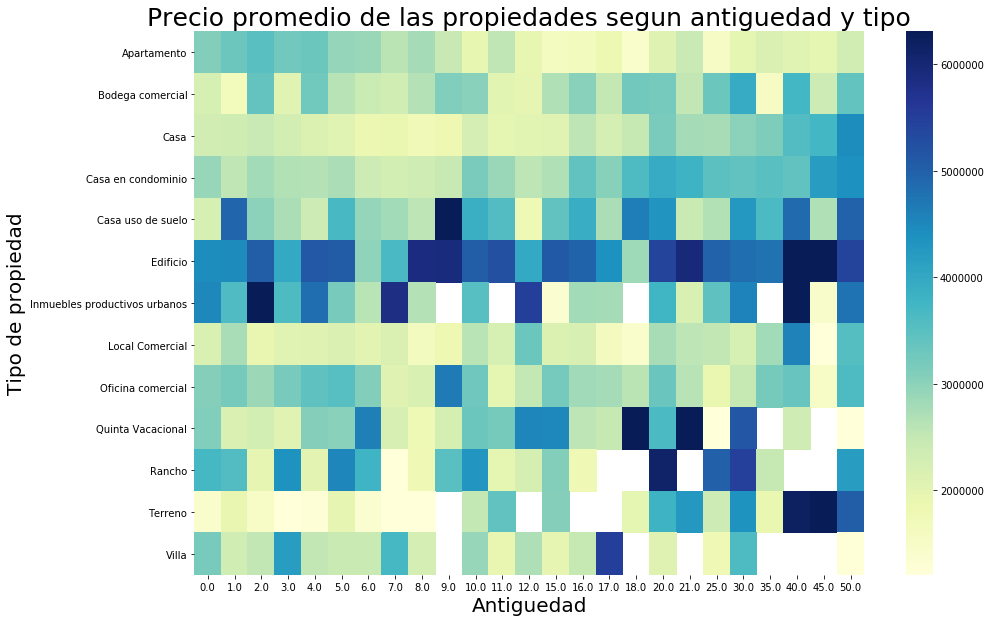

In [364]:
plt.figure(figsize=(15,10))
g = sns.heatmap(dfgraficable,robust= True, cmap="YlGnBu")  #annot=True
g.set_title("Precio promedio de las propiedades segun antiguedad y tipo", fontsize=25)
g.set_xlabel("Antiguedad",fontsize=20)
g.set_ylabel("Tipo de propiedad", fontsize=20)



In [155]:
#Analizando precio por provincia de casas y apartamentos
df_casas= df[df['tipodepropiedad']=='Casa']
df_apartamentos= df[df['tipodepropiedad']=='Apartamento']

In [156]:
df_apartamentos['provincia'].value_counts()

Distrito Federal         33839
Edo. de México            8297
Jalisco                   2638
Nuevo León                1847
San luis Potosí           1686
Guerrero                  1586
Puebla                    1522
Quintana Roo              1273
Querétaro                 1084
Morelos                    859
Yucatán                    573
Veracruz                   565
Tamaulipas                 232
Baja California Norte      196
Michoacán                  158
Guanajuato                 148
Nayarit                    107
Tabasco                     97
Sinaloa                     86
Colima                      83
Baja California Sur         82
Chiapas                     52
Hidalgo                     51
Oaxaca                      49
Aguascalientes              47
Chihuahua                   41
Tlaxcala                    31
Durango                     26
Coahuila                    20
Sonora                      17
Campeche                     7
Zacatecas                    1
Name: pr

In [157]:
#ME quedo con las provincias con mas datos para analizar
filtro_provincias=df_apartamentos['provincia'].value_counts()>200
filtro_provincias=filtro_provincias[filtro_provincias]
df_apartamentos=df_apartamentos[df_apartamentos['provincia'].isin(filtro_provincias.index)]

Text(0, 0.5, 'Provincia')

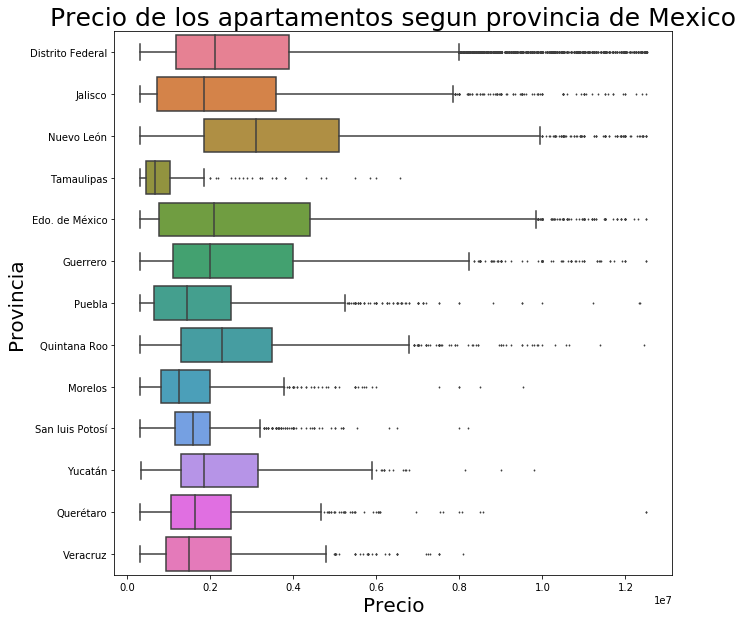

In [158]:
plt.figure(figsize=(10,10))
g = sns.boxplot(x="precio", y="provincia", data=df_apartamentos, palette="husl",fliersize=1)
g.set_title("Precio de los apartamentos segun provincia de Mexico", fontsize=25)
g.set_xlabel("Precio", fontsize=20)
g.set_ylabel("Provincia", fontsize=20)
#Parece haber un precio minimo para publicar y que los dptos mas costos estan en Nuevo Leon 

In [159]:
df_casas['provincia'].value_counts()

Edo. de México           25938
Distrito Federal         15812
Jalisco                  14196
Nuevo León               11477
Querétaro                11396
Puebla                    6577
Yucatán                   6472
San luis Potosí           5612
Morelos                   4626
Veracruz                  4445
Chihuahua                 3891
Coahuila                  3329
Baja California Norte     2769
Sonora                    2732
Quintana Roo              2343
Guanajuato                2318
Hidalgo                   2134
Durango                   1995
Michoacán                 1981
Tamaulipas                1822
Baja California Sur       1473
Sinaloa                   1449
Aguascalientes            1340
Nayarit                    978
Chiapas                    903
Colima                     777
Tabasco                    722
Tlaxcala                   716
Guerrero                   578
Oaxaca                     529
Campeche                   210
Zacatecas                   80
Name: pr

In [160]:
#ME quedo con las provincias con mas datos para analizar
filtro_provincias=df_casas['provincia'].value_counts()>1000
filtro_provincias=filtro_provincias[filtro_provincias]
df_casas=df_casas[df_casas['provincia'].isin(filtro_provincias.index)]

Text(0, 0.5, 'Provincia')

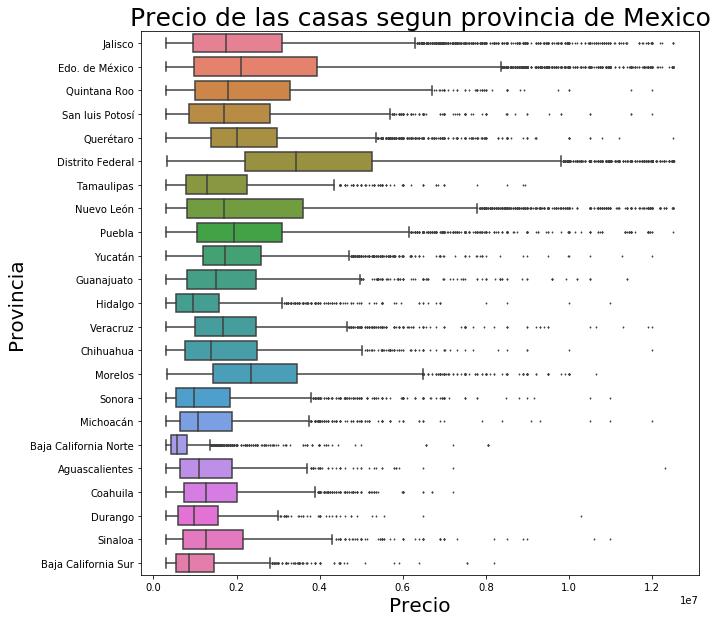

In [161]:
plt.figure(figsize=(10,10))
g = sns.boxplot(x="precio", y="provincia", data=df_casas, palette="husl",fliersize=1)
g.set_title("Precio de las casas segun provincia de Mexico", fontsize=25)
g.set_xlabel("Precio", fontsize=20)
g.set_ylabel("Provincia", fontsize=20)
#Parece haber un precio minimo para poder publicar y que las casas  mas costosas estan en DF